In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [8]:
# Cargar el dataset de Iris
iris = load_iris()

# Convertirlo a un DataFrame de pandas para explorarlo mejor
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Ver las primeras filas del DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [9]:
# Dividir el conjunto de datos en entrenamiento y prueba
X = df.iloc[:, :-1]  # Todas las columnas menos la última (características)
y = df.iloc[:, -1]   # La última columna (etiqueta/target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (120, 4)
Tamaño del conjunto de prueba: (30, 4)


In [10]:
# Crear el modelo k-NN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [11]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)


Precisión del modelo: 1.00

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


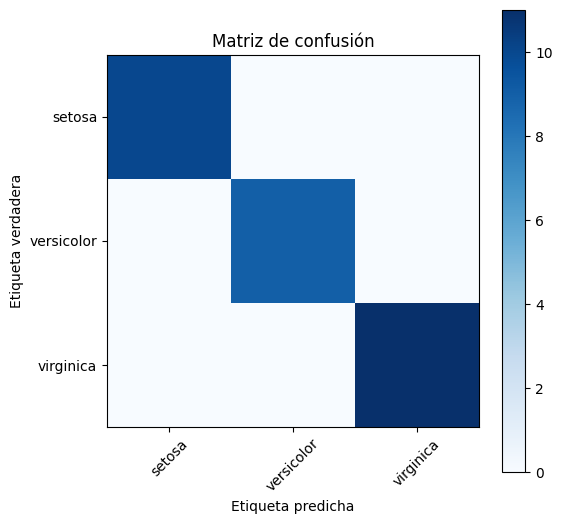

In [12]:
# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar un reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Mostrar la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Graficar la matriz de confusión
plt.figure(figsize=(6,6))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
plt.xticks(range(3), iris.target_names, rotation=45)
plt.yticks(range(3), iris.target_names)
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()
